In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

In [16]:
url = "https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv"
data = pd.read_csv(url)

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [18]:
print(data.describe())

       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min

In [19]:
print(data.isnull().sum())

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

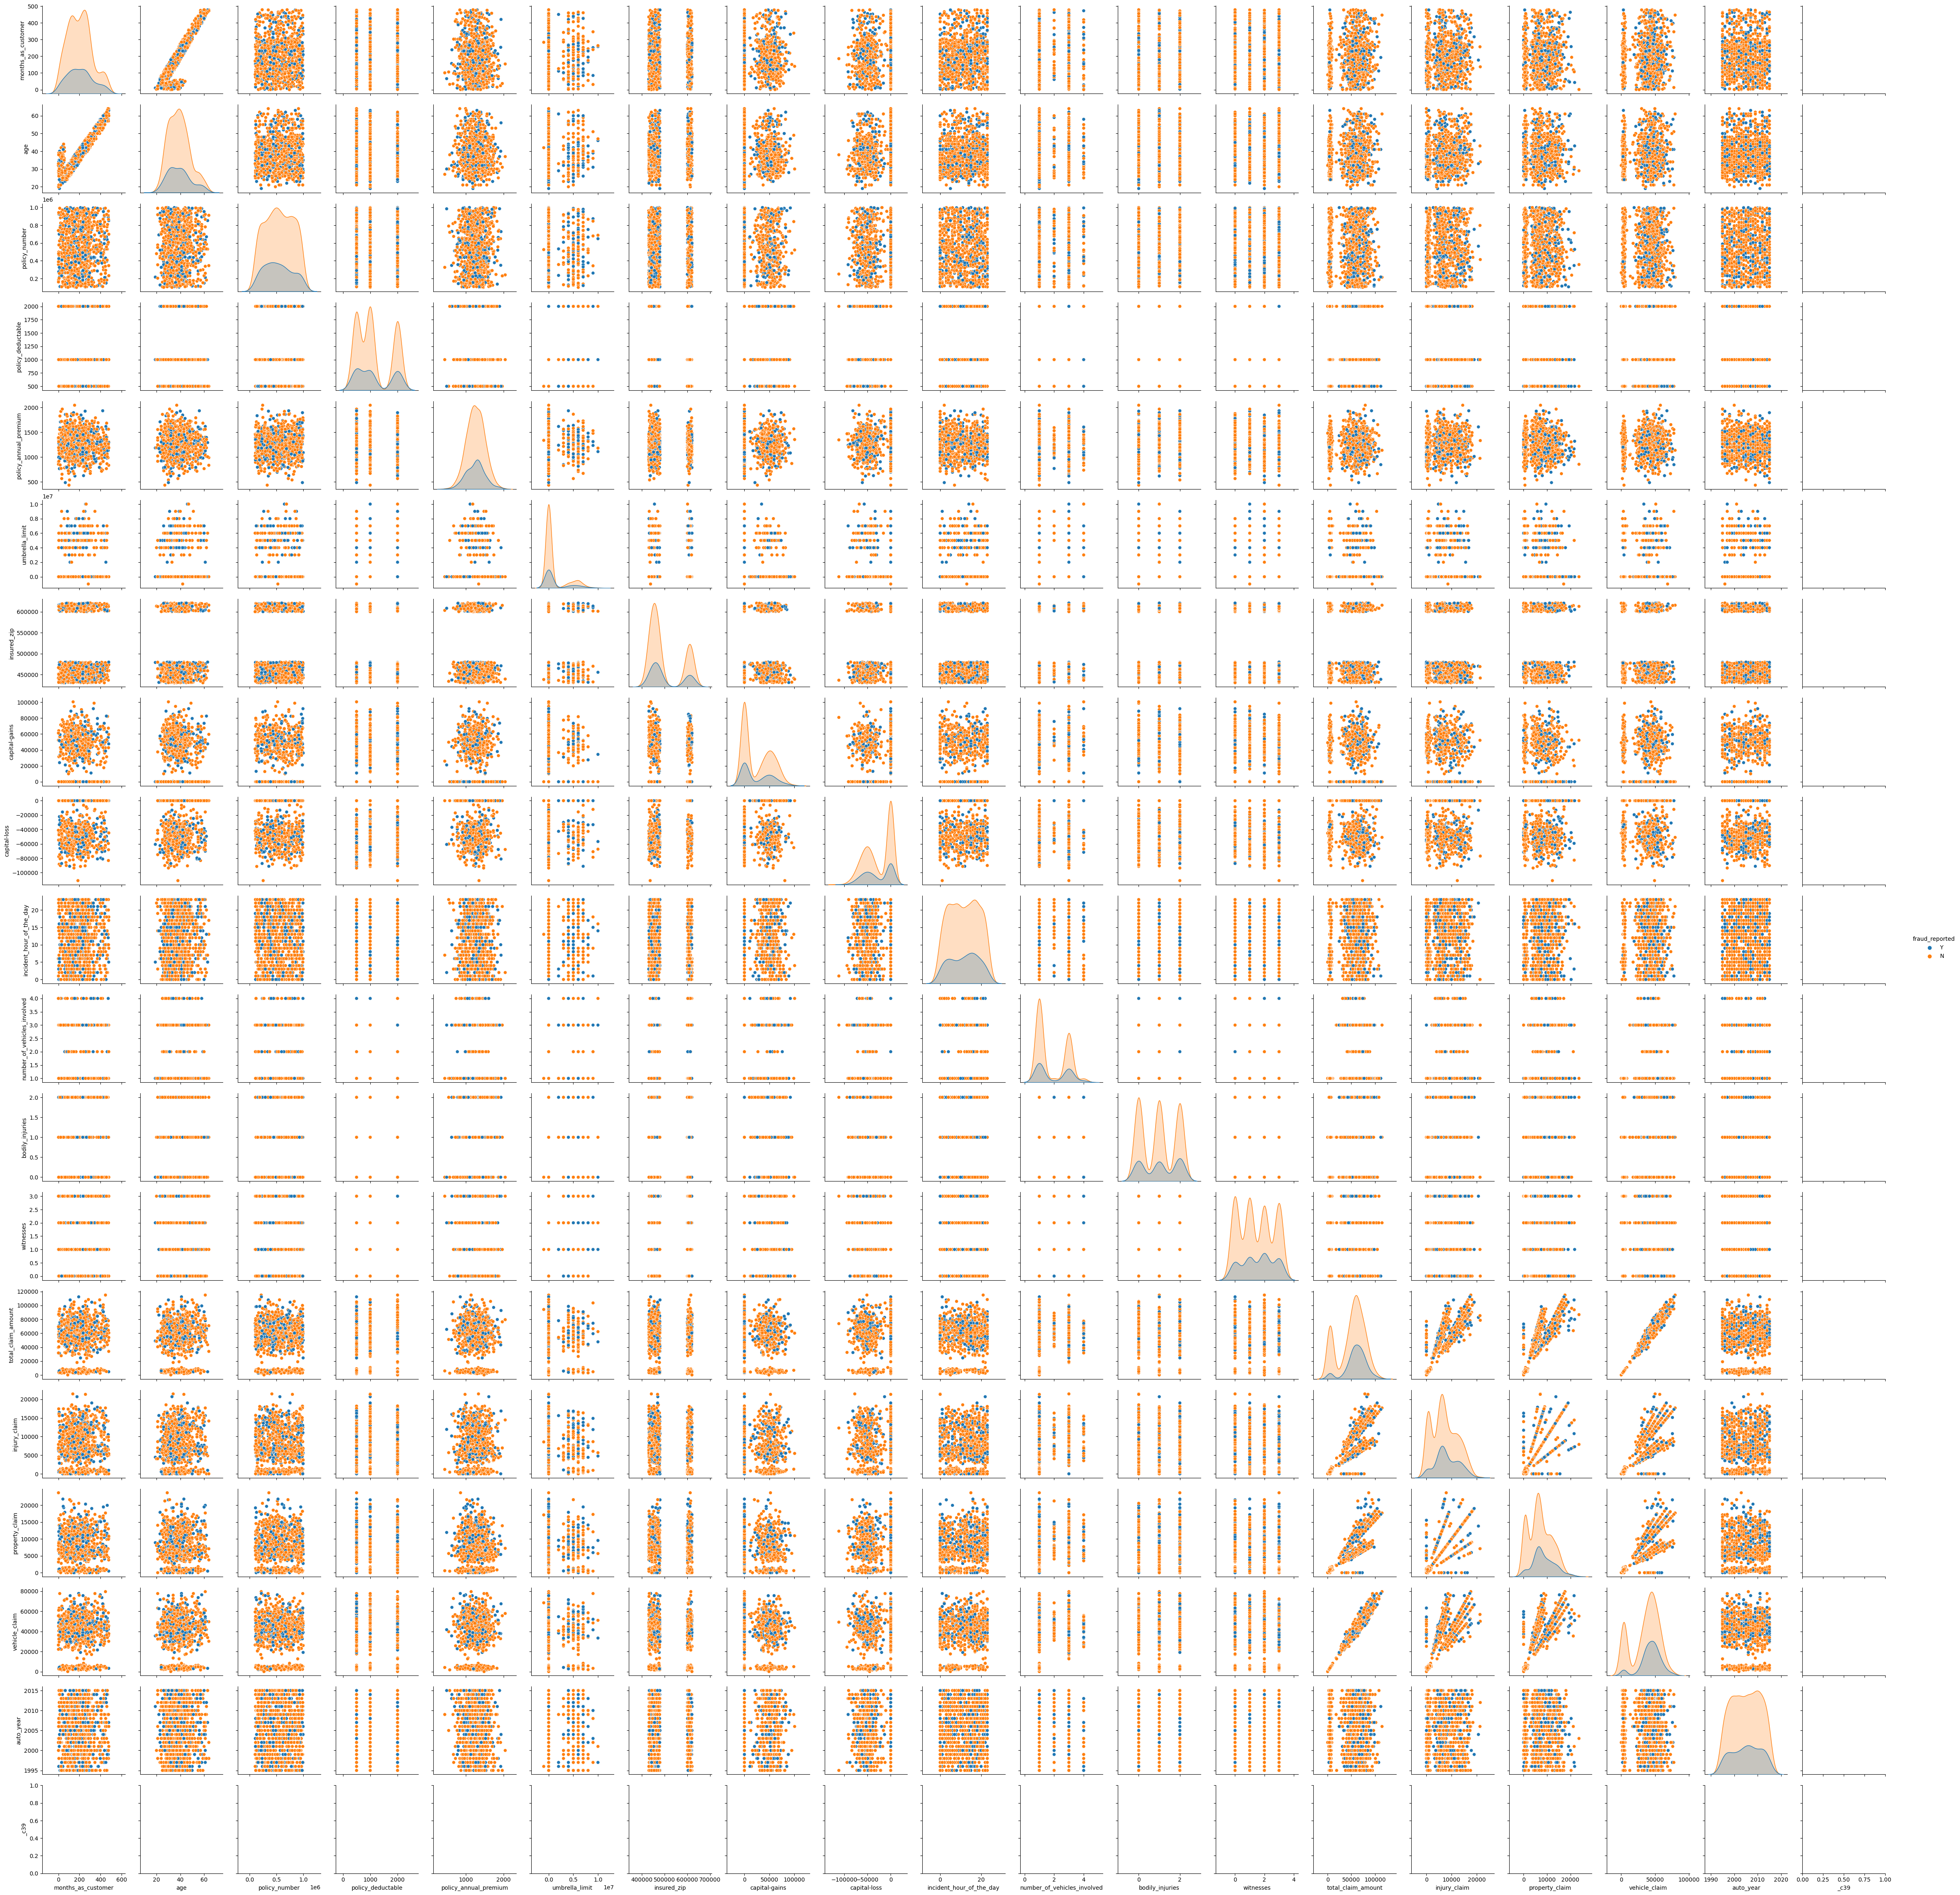

In [20]:
sns.pairplot(data, hue='fraud_reported')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11148\3108038369.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


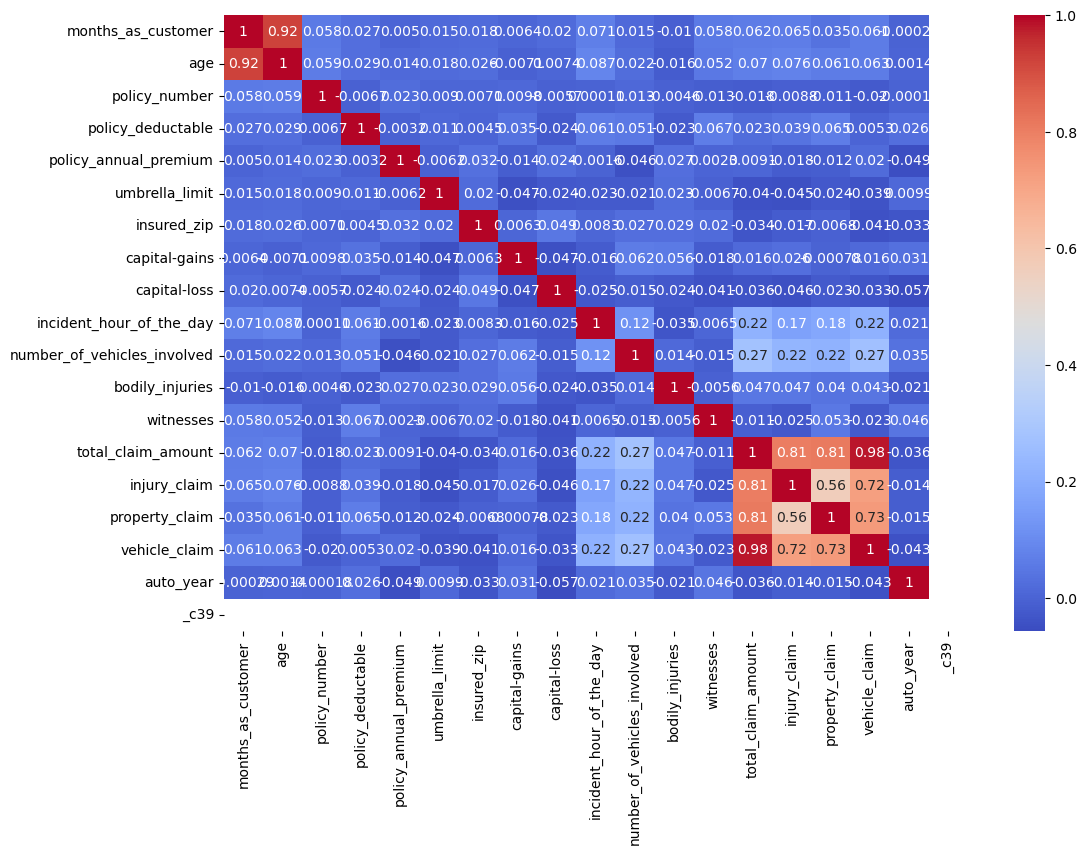

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [22]:
print(data['fraud_reported'].isnull().sum())

0


In [23]:
fraud_reported = data['fraud_reported']

In [24]:
data_without_fraud_reported = data.drop('fraud_reported', axis=1)

In [25]:
data_encoded = pd.get_dummies(data_without_fraud_reported, drop_first=True)

In [26]:
data_final = pd.concat([data_encoded, fraud_reported], axis=1)

In [27]:
print(data_final.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       ...
       'auto_model_RAM', 'auto_model_RSX', 'auto_model_Silverado',
       'auto_model_TL', 'auto_model_Tahoe', 'auto_model_Ultima',
       'auto_model_Wrangler', 'auto_model_X5', 'auto_model_X6',
       'fraud_reported'],
      dtype='object', length=2156)


In [30]:
categorical_variables = ['policy_state', 'insured_sex', 'insured_education_level']  # List of categorical variables

# Inspect unique values of categorical variables
for col in categorical_variables:
    print(col, data[col].unique())

policy_state ['OH' 'IN' 'IL']
insured_sex ['MALE' 'FEMALE']
insured_education_level ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']


In [31]:
print("Before encoding:", data.shape)
data_encoded = pd.get_dummies(data, columns=categorical_variables, drop_first=True)
print("After encoding:", data_encoded.shape)
print(data_encoded.columns)

Before encoding: (1000, 40)
After encoding: (1000, 46)
Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'policy_state_IN',
       'policy_state_OH', 'insured_sex_MALE',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD'

In [32]:
# Get the list of new columns created after encoding
new_columns = data_encoded.columns.difference(data.columns)

# Inspect the names and contents of the new columns
for col in new_columns:
    print(col, data_encoded[col].unique())

insured_education_level_College [0 1]
insured_education_level_High School [0 1]
insured_education_level_JD [0 1]
insured_education_level_MD [1 0]
insured_education_level_Masters [0 1]
insured_education_level_PhD [0 1]
insured_sex_MALE [1 0]
policy_state_IN [0 1]
policy_state_OH [1 0]


In [36]:
X = data_encoded.drop('fraud_reported', axis=1)
y = data_encoded['fraud_reported']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier()}

In [50]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('classifier', LogisticRegression())          # Logistic Regression model
])


In [51]:
pipeline.fit(X_train, y_train)

C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', LogisticRegression())])

In [52]:
y_pred = pipeline.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       145
           1       0.50      0.02      0.04        55

    accuracy                           0.73       200
   macro avg       0.61      0.51      0.44       200
weighted avg       0.66      0.72      0.62       200

[[144   1]
 [ 54   1]]


In [56]:
pipelines = {
    'Logistic Regression': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('classifier', LogisticRegression())
    ]),
    'Decision Tree': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('classifier', DecisionTreeClassifier())
    ]),
    'Random Forest': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('classifier', RandomForestClassifier())
    ])
}

# Train and evaluate models
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

C:\Users\User\anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       145
           1       0.50      0.02      0.04        55

    accuracy                           0.73       200
   macro avg       0.61      0.51      0.44       200
weighted avg       0.66      0.72      0.62       200

[[144   1]
 [ 54   1]]
Model: Decision Tree
Accuracy: 0.775
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       145
           1       0.62      0.47      0.54        55

    accuracy                           0.78       200
   macro avg       0.72      0.68      0.69       200
weighted avg       0.76      0.78      0.76       200

[[129  16]
 [ 29  26]]
Model: Random Forest
Accuracy: 0.715
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       145
           1       0.00      0.00      0.00        55

    accuracy       